# Notebook to load and play around with fasta file

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
import socket
import os as os

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(f"Current machine: {socket_name}")
if socket_name == "DESKTOP-5RJD9NC":
    path = "/gitProjects/covid19_data"   # The Path on Harald's machine
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

Current machine: DESKTOP-5RJD9NC
D:\gitProjects\covid19_data


In [3]:
def fasta_iter(fasta_name):
    """
    modified from Brent Pedersen
    Correct Way To Parse A Fasta File In Python
    given a fasta file. yield tuples of header, sequence
    """
    "first open the file outside "
    fh = open(fasta_name)

    # ditch the boolean (x[0]) and just keep the header or sequence since
    # we know they alternate.
    faiter = (x[1] for x in groupby(fh, lambda line: line[0] == ">"))

    for header in faiter:
        # drop the ">"
        headerStr = header.__next__()[1:].strip()

        # join all sequence lines to one.
        seq = "".join(s.strip() for s in faiter.__next__())

        yield (headerStr, seq) 

### Load Fasta File

In [25]:
def load_fasta(month="mar20", day=26):
    """Function to load Fasta according to file structure.
    Return Generator for Data"""
    data_path = os.path.join("data", month, f"gisaid_cov2020_sequences_{day}.fasta")
    fiter = fasta_iter(data_path)
    return fiter

In [39]:
fiter = load_fasta(month="mar20", day=26)

In [42]:
%%time
#fiter = fasta_iter(data_path)
iids = [ff[0] for ff in fiter]

fiter = load_fasta(month="mar20", day=26)
seqs = [ff[1] for ff in fiter]

Wall time: 620 ms


In [ ]:
seqs

In [47]:
ll = np.array([len(s) for s in seqs])

In [49]:
shorties = ll[ll<1000]

In [50]:
ses_s = se

array([402, 290, 322, 290, 290, 363, 363, 315, 524, 595, 587, 321, 587,
       406, 322, 322, 369, 402, 402, 402, 253, 322, 322,  87, 399, 182,
       357, 294, 294, 294, 294, 294, 294, 287, 287, 107, 107, 107, 287,
       287, 107, 107, 107, 107, 287, 321, 321, 321, 321, 321, 321, 321,
       321, 321, 363, 363, 363, 363, 363, 402, 402, 400, 402, 387, 387,
       387, 357, 357, 395])

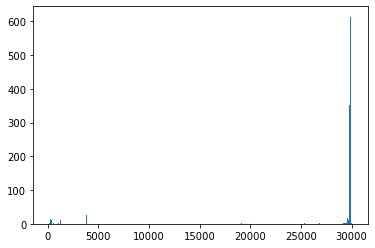

In [37]:
plt.figure()
ax=plt.gca()
ax.hist(ll, bins=1000)
plt.show()